In [32]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library(tidyr)


In [33]:
## Read data in, change path as necessary

# One line per election
elections_2016 <- read.csv("2016_election_results_wide.csv")

# One line per candidate
elections_2016_long <- read.csv("2016_election_results_long.csv")

# One line per election
elections_2018 <- read.csv("2018_election_results_wide.csv")

# One line per candidate
elections_2018_long <- read.csv("2018_election_results_long.csv")

head(elections_2016)
head(elections_2016_long)
head(elections_2018)
head(elections_2018_long)


,X,democrat,republican,other,state,year,district,democrat_incumbent,democrat_votes,republican_incumbent,republican_votes,other_incumbent,other_votes,gender_dem,gender_rep,winner_party,winner_gender,vote_prop_dem,vote_prop_rep,vote_prop_other
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,Scott J. Kawasaki,No candidate,No candidate,Alaska,2016,1,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000,0.0000000
2,2,Truno Holdaway,Steve M. Thompson,No candidate,Alaska,2016,2,False,1153,True,3268,0,0,Unknown,male,Republican,male,0.26080072,0.7391993,0.0000000
3,3,Christina M. Sinclair,Tammie Wilson,Jeanne Olson,Alaska,2016,3,False,537,True,4291,False,2270,female,female,Republican,female,0.07565511,0.6045365,0.3198084
4,4,David Guttenberg,No candidate,No candidate,Alaska,2016,4,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000,0.0000000
5,5,Adam Wool,Aaron Lojewski,No candidate,Alaska,2016,5,True,3812,False,3384,0,0,male,male,Democrat,male,0.52973874,0.4702613,0.0000000
6,6,Jason T. Land,David M. Talerico,No candidate,Alaska,2016,6,False,2327,True,5126,0,0,male,male,Republican,male,0.31222327,0.6877767,0.0000000


,X,candidate,state,district,year,incumbent,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,Scott J. Kawasaki,Alaska,1,2016,True,1,1.00000000,male,Democrat,Democrat,Missing
2,2,Truno Holdaway,Alaska,2,2016,False,1153,0.26080072,Unknown,Republican,Democrat,Missing
3,3,Christina M. Sinclair,Alaska,3,2016,False,537,0.07565511,female,Republican,Democrat,Missing
4,4,David Guttenberg,Alaska,4,2016,True,1,1.00000000,male,Democrat,Democrat,Missing
5,5,Adam Wool,Alaska,5,2016,True,3812,0.52973874,male,Democrat,Democrat,Missing
6,6,Jason T. Land,Alaska,6,2016,False,2327,0.31222327,male,Republican,Democrat,Missing


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018


,X,year,state,district,office,candidate,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat,Missing
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat,Missing
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing


In [34]:
## Add regions in
## Region generator
# Need to manually change states depending on form, e.g. RI/Rhode Island/RHODE ISLAND

states_northeast <- c("Connecticut", "Maine", "Massachusetts",
                      "New Hampshire", "New Jersey", "New York", "Pennsylvania", 
                      "Rhode Island", "Vermont")
states_west <- c("Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", 
                 "New Mexico", "Oregon", "Utah", "Washington", "Wyoming")
states_midwest <- c("Indiana", "Illinois", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", 
                    "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")
states_south <- c("Alabama", "Arkansas", "Delaware", "District of Columbia", 
                  "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", 
                  "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", 
                  "Virginia", "West Virginia")
elections_2016 <- elections_2016 %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2016_long <- elections_2016_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018 <- elections_2018 %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018_long <- elections_2018_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))


`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



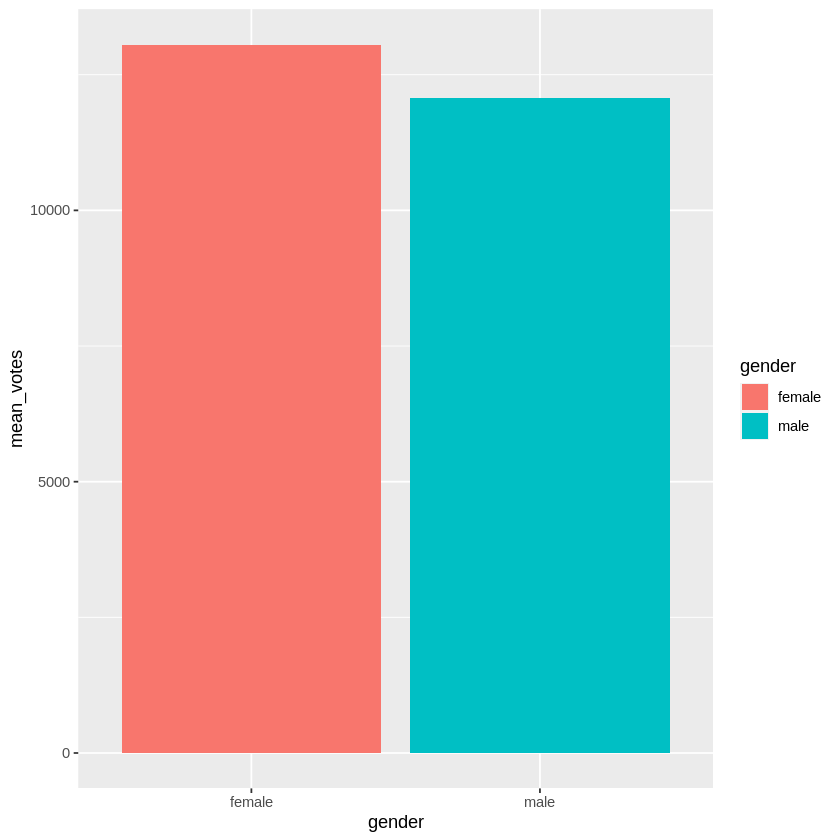

`summarise()` ungrouping output (override with `.groups` argument)



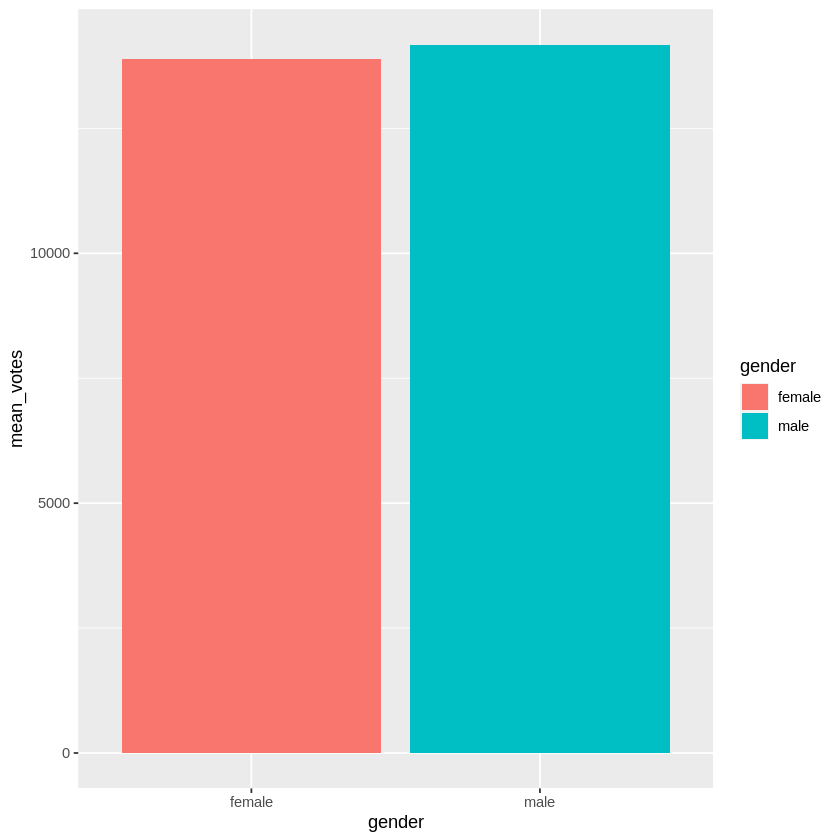

`summarise()` ungrouping output (override with `.groups` argument)



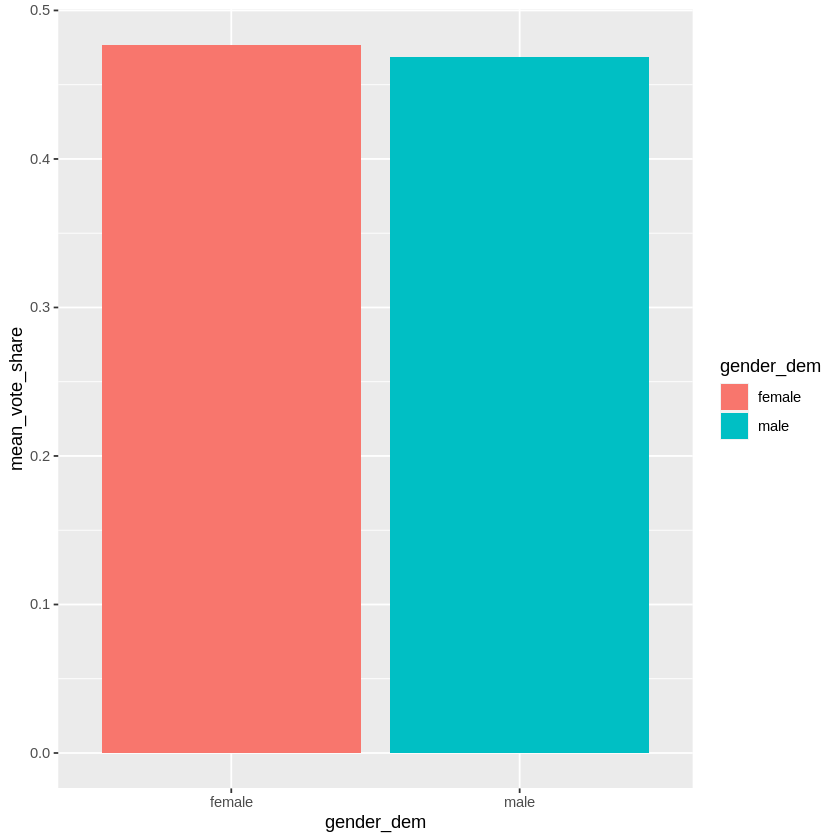

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



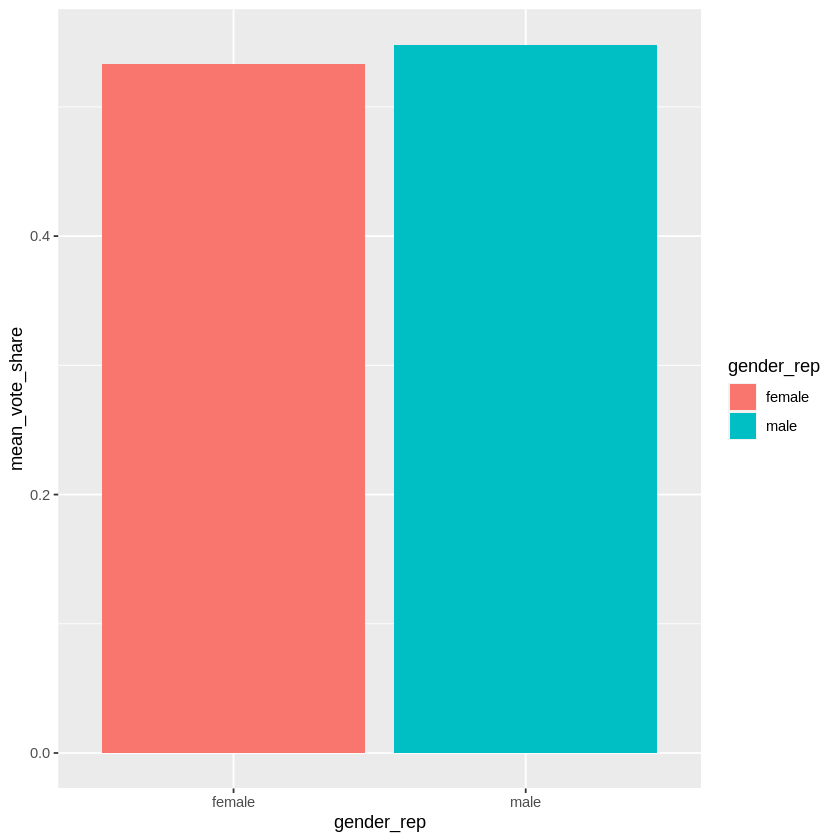

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



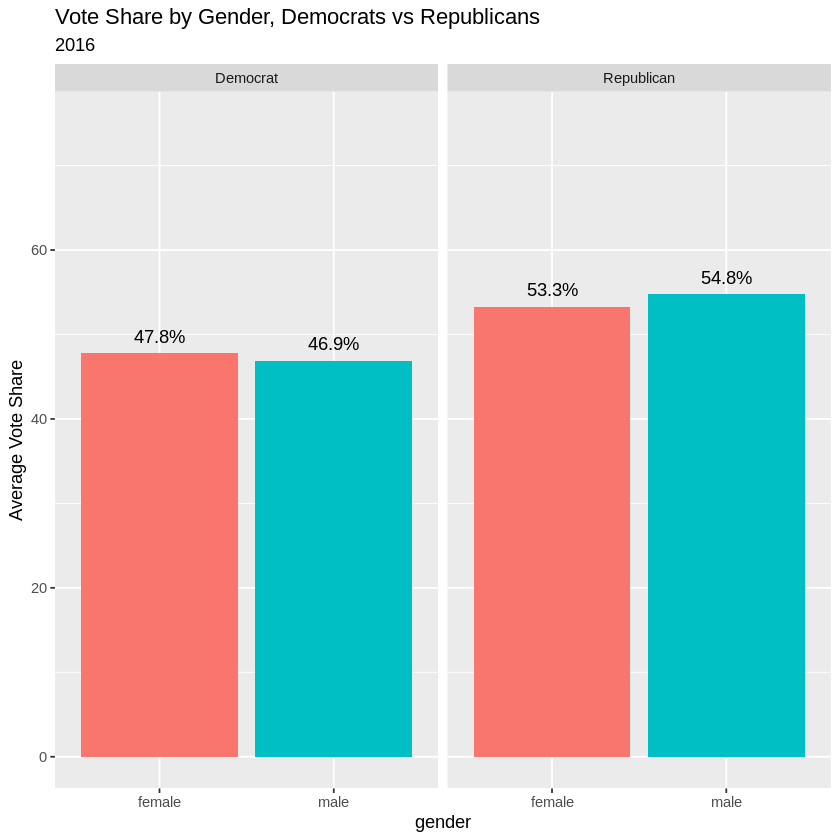

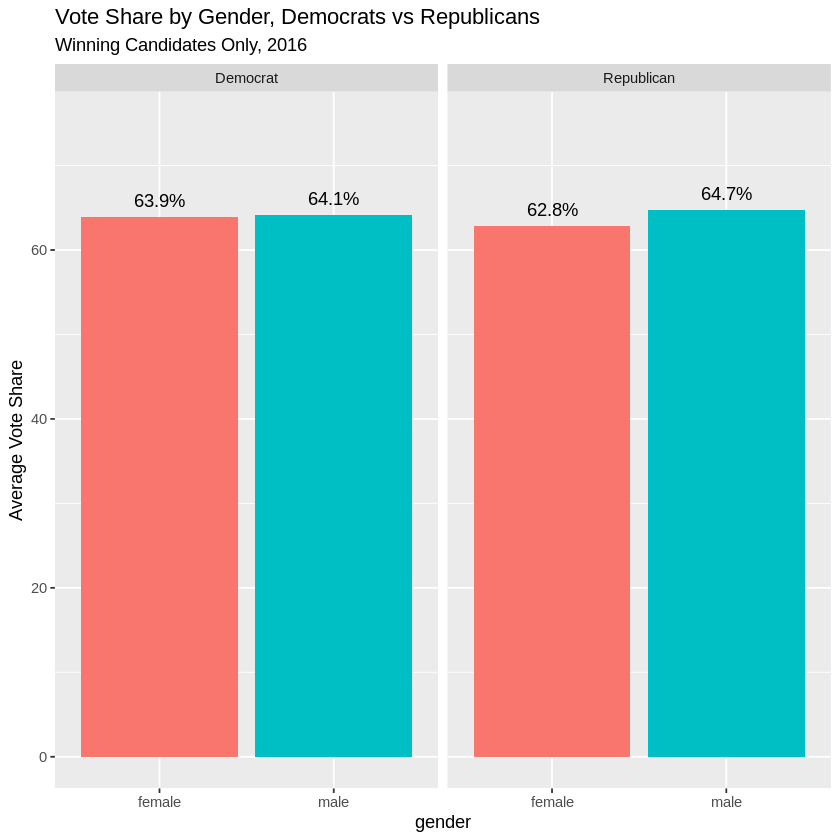

In [35]:
## Basic descriptives for 2016, separated by party

elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), !is.na(total_votes)) %>%
    group_by(year, gender) %>%
    summarize(mean_votes = mean(total_votes)) %>%
    ggplot(aes(x = gender, y = mean_votes, fill = gender)) + 
        geom_bar(stat = "identity")
        


elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"), !is.na(total_votes)) %>%
    group_by(year, gender) %>%
    summarize(mean_votes = mean(total_votes)) %>%
    ggplot(aes(x = gender, y = mean_votes, fill = gender)) + 
        geom_bar(stat = "identity")


elections_2016 %>%
    group_by(gender_dem) %>%
    filter(gender_dem %in% c("male", "female"), !is.na(vote_prop_dem), !vote_prop_dem == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(vote_prop_dem)) %>%
    ggplot(aes(x = gender_dem, y = mean_vote_share, fill = gender_dem)) + 
        geom_bar(stat = "identity")


elections_2016 %>%
    group_by(gender_rep) %>%
    filter(gender_rep %in% c("male", "female"), !is.na(vote_prop_rep), !vote_prop_rep == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(vote_prop_rep)) %>% 
    ggplot(aes(x = gender_rep, y = mean_vote_share, fill = gender_rep)) + 
        geom_bar(stat = "identity")


elections_2016_long %>%
    filter(gender %in% c("male", "female"), !is.na(vote_prop), vote_prop != 1) %>%
    group_by(candidate_party, gender) %>%
    summarize(avg_vote_prop = round(100*mean(vote_prop),1)) %>%
    ggplot(aes(x = gender, y = avg_vote_prop, fill = gender, label = paste(avg_vote_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        ylim(0,75) + 
        labs(title = "Vote Share by Gender, Democrats vs Republicans",
             subtitle = "2016",
            x = "gender",
            y = "Average Vote Share") +
        theme(legend.position = "none")


elections_2016_long %>%
    filter(gender %in% c("male", "female"), !is.na(vote_prop), vote_prop != 1, candidate_party == winner_party) %>%
    group_by(candidate_party, gender) %>%
    summarize(avg_vote_prop = round(100*mean(vote_prop),1)) %>%
    ggplot(aes(x = gender, y = avg_vote_prop, fill = gender, label = paste(avg_vote_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        ylim(0,75) + 
        labs(title = "Vote Share by Gender, Democrats vs Republicans",
             subtitle = "Winning Candidates Only, 2016",
            x = "gender",
            y = "Average Vote Share") +
        theme(legend.position = "none")




`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



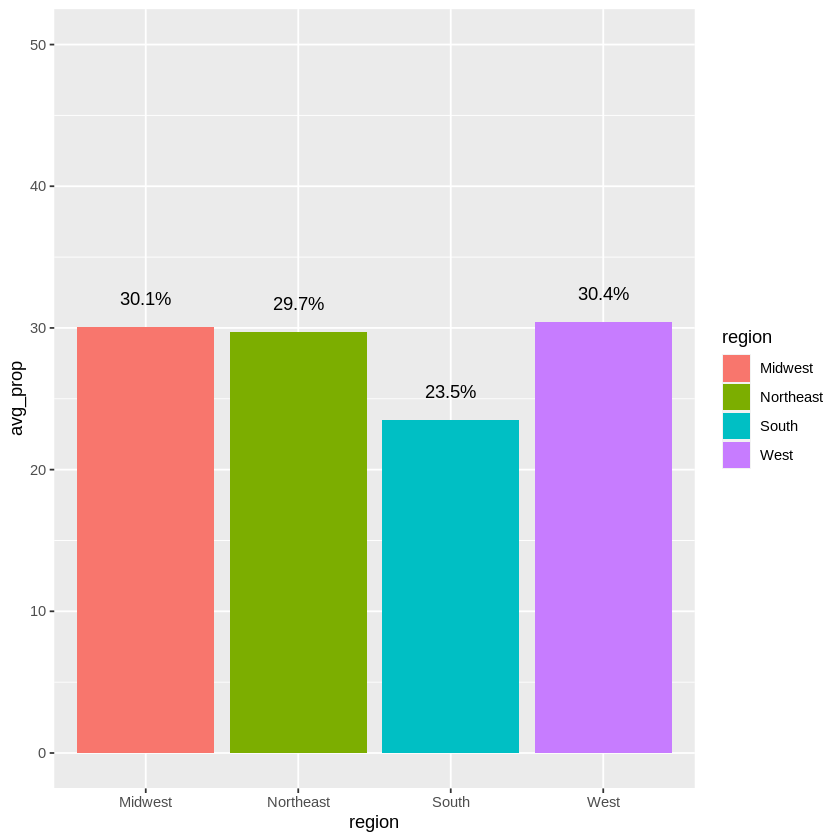

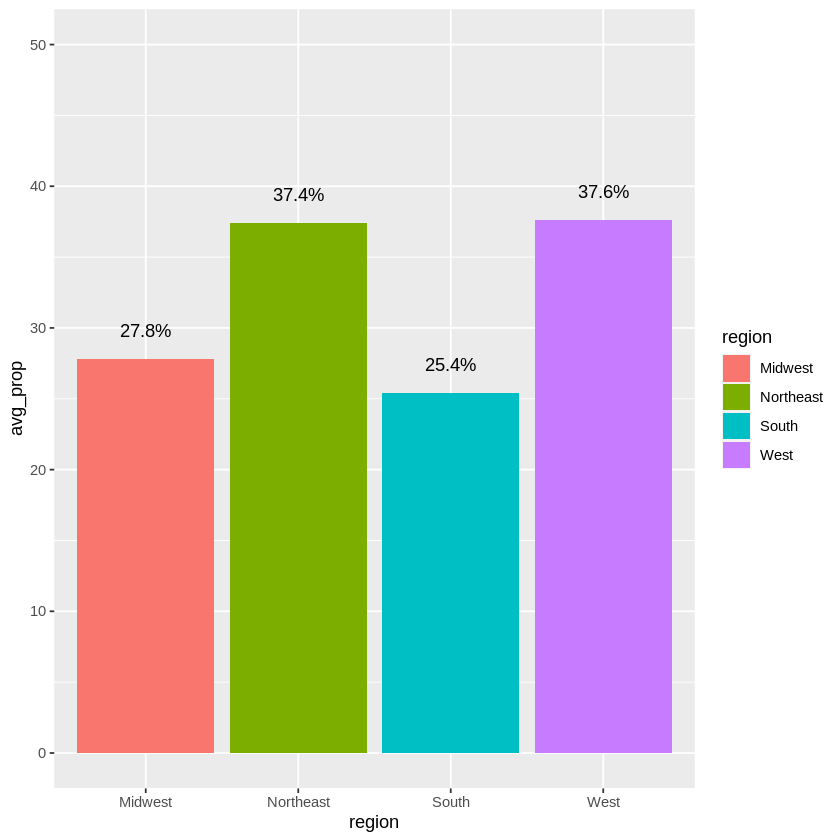

Saving 6.67 x 6.67 in image



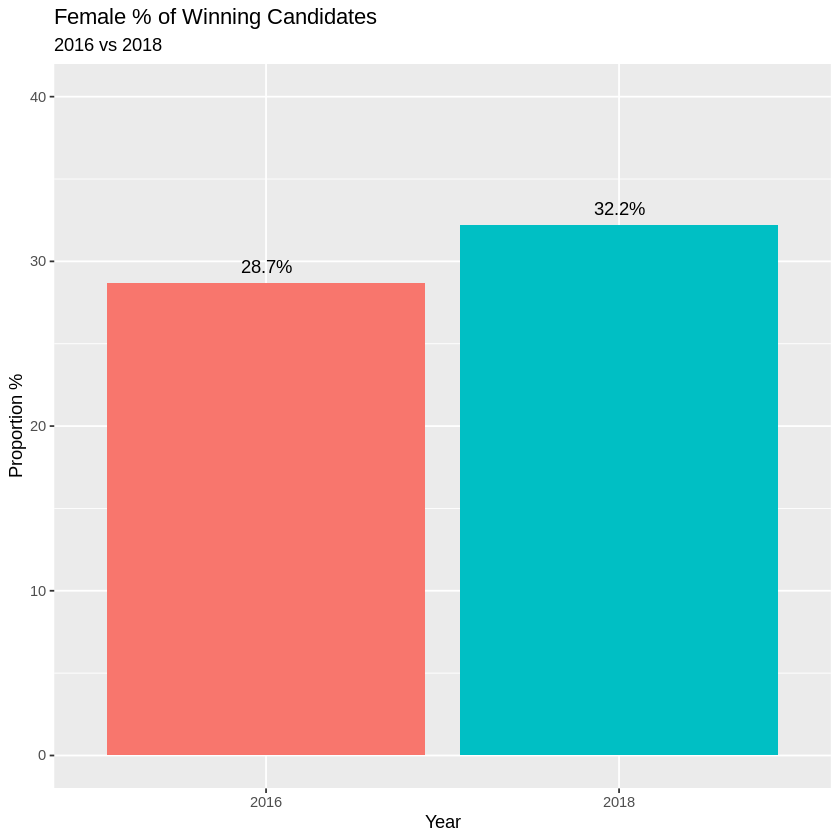

Saving 6.67 x 6.67 in image

`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Midwest,female,200,0.3007519
Midwest,male,465,0.6992481
Northeast,female,112,0.2970822
Northeast,male,265,0.7029178
South,female,101,0.2354312
South,male,328,0.7645688
West,female,153,0.3035714
West,male,351,0.6964286


`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Midwest,female,216,0.2783505
Midwest,male,560,0.7216495
Northeast,female,437,0.3744644
Northeast,male,730,0.6255356
South,female,211,0.2539110
South,male,620,0.7460890
West,female,214,0.3760984
West,male,355,0.6239016


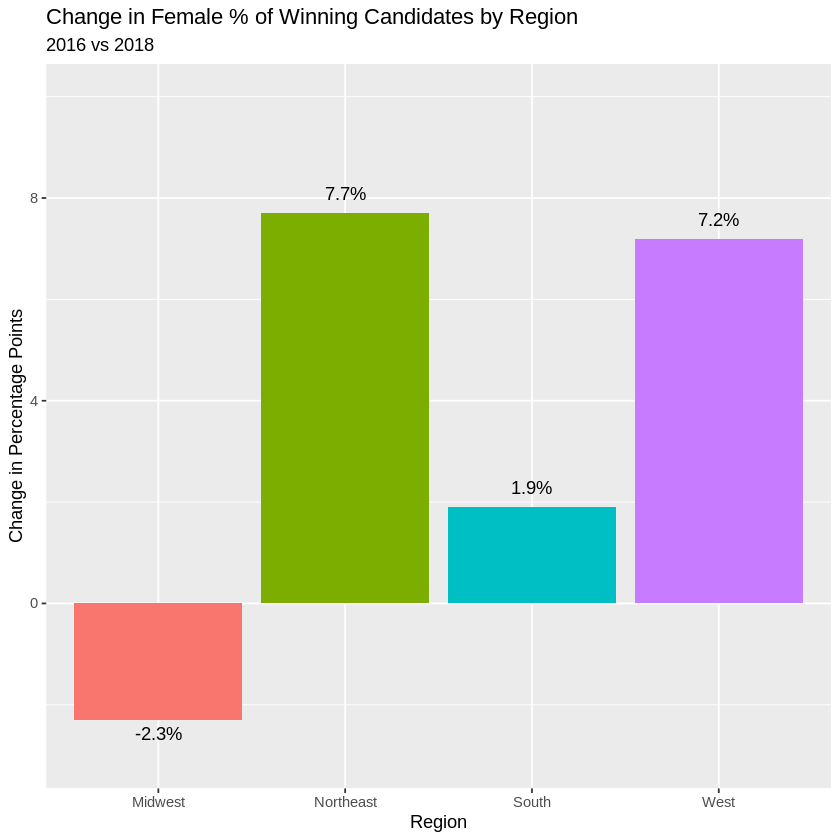

In [36]:
## Female proportion of winners, 2016 vs 2018

# 2016, female % of winning candidates
female_win_2016 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2016)

# By region
female_win_region_16 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(region, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2016)

female_win_region_16 %>%
    ggplot(aes(x = region, y = avg_prop, fill = region, label = paste(avg_prop, "%", sep = ""))) +
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) +
        ylim(0,50)


# 2018, female % of winning candidates
female_win_2018 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2018)



# By region
female_win_region_18 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(region, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    summarize(avg_prop = round(100*mean(prop),1)) %>%
    mutate(year = 2018)

female_win_region_18 %>%
    ggplot(aes(x = region, y = avg_prop, fill = region, label = paste(avg_prop, "%", sep = ""))) +
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) +
        ylim(0,50)



# 2016 vs 2018 overall
female_win_2016 %>%
    rbind(female_win_2018) %>%
    ggplot(aes(x = as.factor(year), y = avg_prop, fill = as.factor(year), label = paste(avg_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,1)) + 
        theme(legend.position = "none") + 
        labs(title = "Female % of Winning Candidates",
            subtitle = "2016 vs 2018",
            x = "Year",
            y = "Proportion %") + 
        ylim(0,40)
ggsave("female_overall_time.png")


# 2016 vs 2018 by region
female_win_region_16 %>%
    left_join(female_win_region_18, by = "region") %>%
    mutate(change_prop = avg_prop.y - avg_prop.x,
            vjust = ifelse(change_prop >= 0, -1, 1.5)) %>%
    ggplot(aes(x = region, y = change_prop, fill = region)) + 
        geom_bar(stat = "identity") + 
        geom_text(aes(label = paste(change_prop, "%", sep = ""), vjust = vjust)) + 
        ylim(-3,10) + 
        theme(legend.position = "none") + 
        labs(title = "Change in Female % of Winning Candidates by Region", 
            subtitle = "2016 vs 2018",
            x = "Region",
            y = "Change in Percentage Points")
ggsave("female_change_region.jpg")


elections_2016 %>%
    group_by(region, winner_gender) %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count))
elections_2018 %>%
    group_by(region, winner_gender) %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count))


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop_16
<chr>,<chr>,<int>,<dbl>
Wyoming,female,4,0.09090909
Oklahoma,female,11,0.16417910
Arkansas,female,4,0.17391304
Tennessee,female,9,0.19148936
South Carolina,female,5,0.19230769
Delaware,female,3,0.20000000
Kentucky,female,12,0.20338983
Indiana,female,14,0.21212121
Utah,female,10,0.21276596


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop_18
<chr>,<chr>,<int>,<dbl>
South Carolina,female,2,0.1000000
Tennessee,female,10,0.1282051
Alabama,female,9,0.1607143
South Dakota,female,14,0.1686747
Indiana,female,17,0.2048193
Delaware,female,6,0.2068966


state,winner_gender.x,count.x,prop_16,winner_gender.y,count.y,prop_18,change
<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
South Carolina,female,5,0.1923077,female,2,0.1000000,-0.09230769
Illinois,female,22,0.4680851,female,32,0.3950617,-0.07302338
Tennessee,female,9,0.1914894,female,10,0.1282051,-0.06328423
Rhode Island,female,9,0.3913043,female,14,0.3333333,-0.05797101
Idaho,female,15,0.3658537,female,17,0.3148148,-0.05103884
Ohio,female,22,0.3142857,female,27,0.2700000,-0.04428571


state,winner_gender.x,count.x,prop_16,winner_gender.y,count.y,prop_18,change
<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
Washington,female,18,0.36734694,female,7,0.4666667,0.09931973
Hawaii,female,5,0.22727273,female,7,0.3333333,0.10606061
Oklahoma,female,11,0.16417910,female,23,0.2738095,0.10963042
New Mexico,female,9,0.34615385,female,17,0.5312500,0.18509615
Wyoming,female,4,0.09090909,NA,NA,NA,NA
Minnesota,female,46,0.36800000,NA,NA,NA,NA


`summarise()` regrouping output by 'region', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'winner_party' (override with `.groups` argument)

Saving 6.67 x 6.67 in image



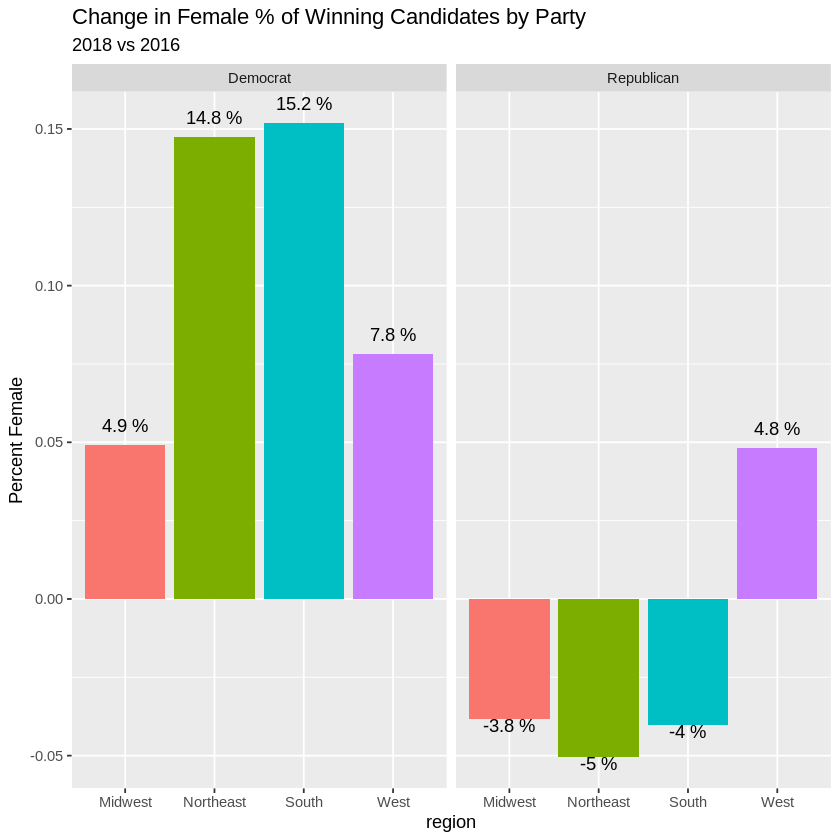

In [50]:
## Gender proportion of winning candidates by state
state_2016 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop_16 = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    arrange(prop_16)
state_2016

state_2018 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop_18 = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    arrange(prop_18) 
head(state_2018)

state_2016 %>%
    left_join(state_2018, by = "state") %>%
    mutate(change = prop_18 - prop_16) %>%
    arrange(change) %>%
    head()
    
state_2016 %>%
    left_join(state_2018, by = "state") %>%
    mutate(change = prop_18 - prop_16) %>%
    arrange(change) %>%
    tail()

# By region and party
region_party_2016 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(region, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop_16 = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    arrange(prop_16)


region_party_2018 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_gender %in% c("male", "female")) %>%
    group_by(region, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop_18 = count/sum(count)) %>%
    filter(winner_gender == "female") %>%
    arrange(prop_18) 


region_party_2016 %>%
    left_join(region_party_2018, by = c("region", "winner_party")) %>%
    mutate(change = prop_18 - prop_16) %>%
    arrange(change) %>%
    ggplot(aes(x = region, y = change, fill = region, label = paste(round(change*100,1), "%"))) +
        geom_bar(stat = "identity") + 
        geom_text(aes(vjust = ifelse(change > 0, -1, 1))) + 
        facet_grid(. ~ winner_party) + 
        theme(legend.position = "none") + 
        labs(title = "Change in Female % of Winning Candidates by Party",
            subtitle = "2018 vs 2016", 
            y = "Percent Female")
ggsave("change_female_win_party.jpg")


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)



region,state,female,male,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>
West,Colorado,0.5000000,0.5000000,0.00000000
West,Nevada,0.5000000,0.5000000,0.00000000
West,Washington,0.4642857,0.5357143,0.07142857
Northeast,Vermont,0.4411765,0.5588235,0.11764706
West,Alaska,0.4347826,0.5652174,0.13043478
West,New Mexico,0.4347826,0.5652174,0.13043478


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



region,avg_diff
<chr>,<dbl>
South,0.5413627
Midwest,0.4685333
Northeast,0.3028204
West,0.2519538


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



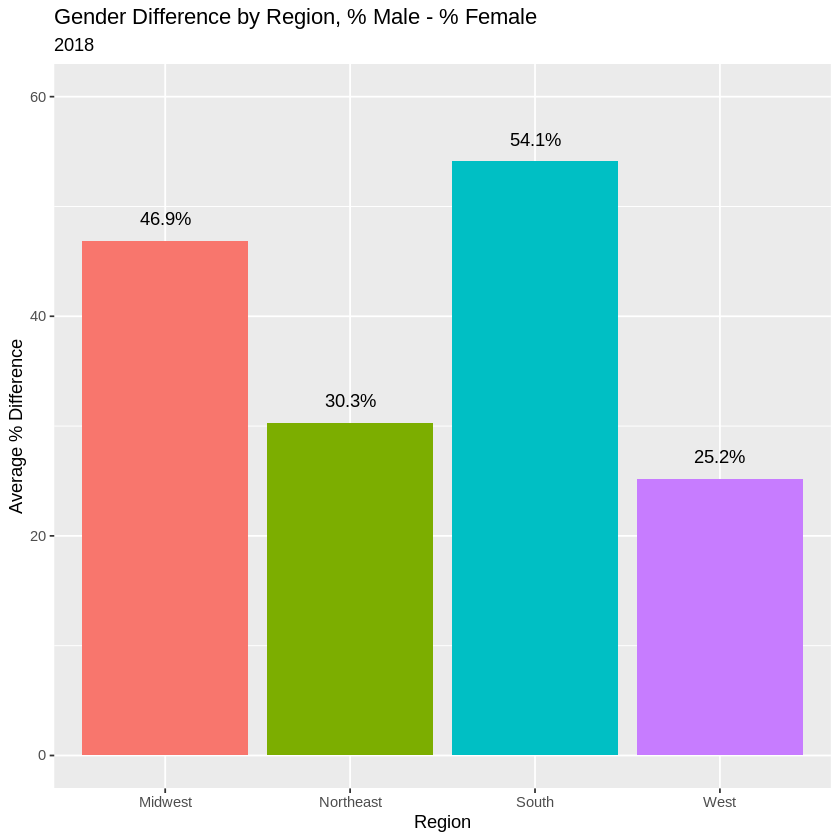

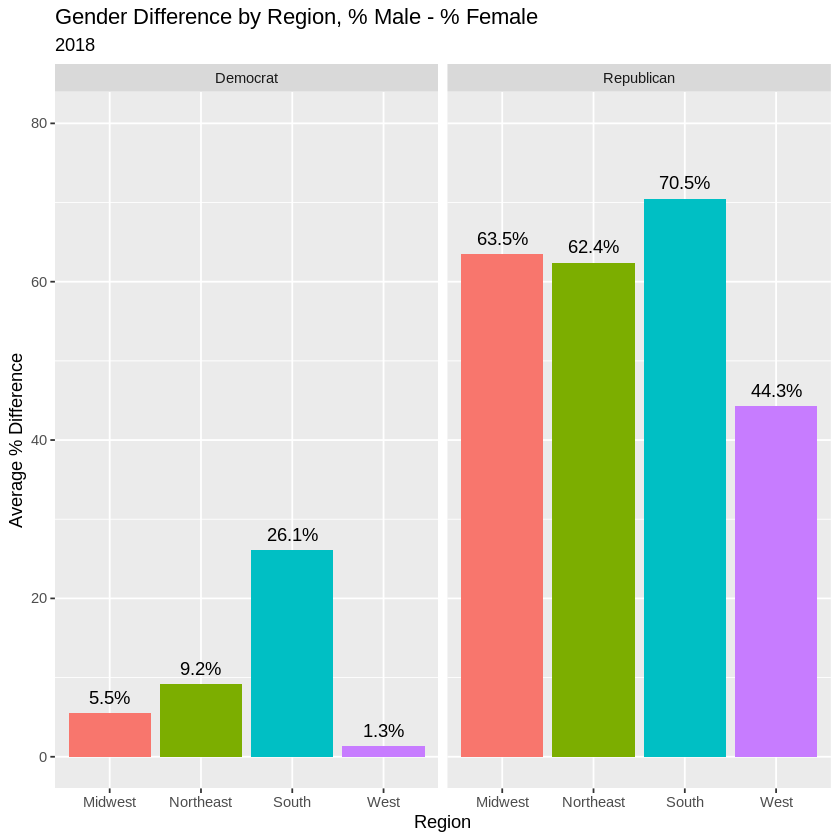

In [38]:
## Same as previous, for 2018
elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    head()

elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
          diff = replace_na(diff, 1)) %>%
    arrange(diff) %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff))


# gender proportion of winning candidates by region
elections_2018 %>%
    filter(winner_gender %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
          diff = replace_na(diff, 1)) %>%
    group_by(region) %>%
    summarize(avg_diff = round(100*mean(diff),1)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region, label = paste(avg_diff, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        labs(title = "Gender Difference by Region, % Male - % Female",
            subtitle = "2018",
            x = "Region", 
            y = "Average % Difference") + 
        theme(legend.position = "none") + 
        ylim(0,60)

# Group by party
elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female,
            diff = replace_na(diff, 1)) %>%
    group_by(region, winner_party) %>%
    summarize(avg_diff = round(100*mean(diff), 1)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region, label = paste(avg_diff, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ winner_party) +
        labs(title = "Gender Difference by Region, % Male - % Female",
            subtitle = "2018",
            x = "Region", 
            y = "Average % Difference") + 
        theme(legend.position = "none") + 
        ylim(0,80)



`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'state', 'winner_party' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



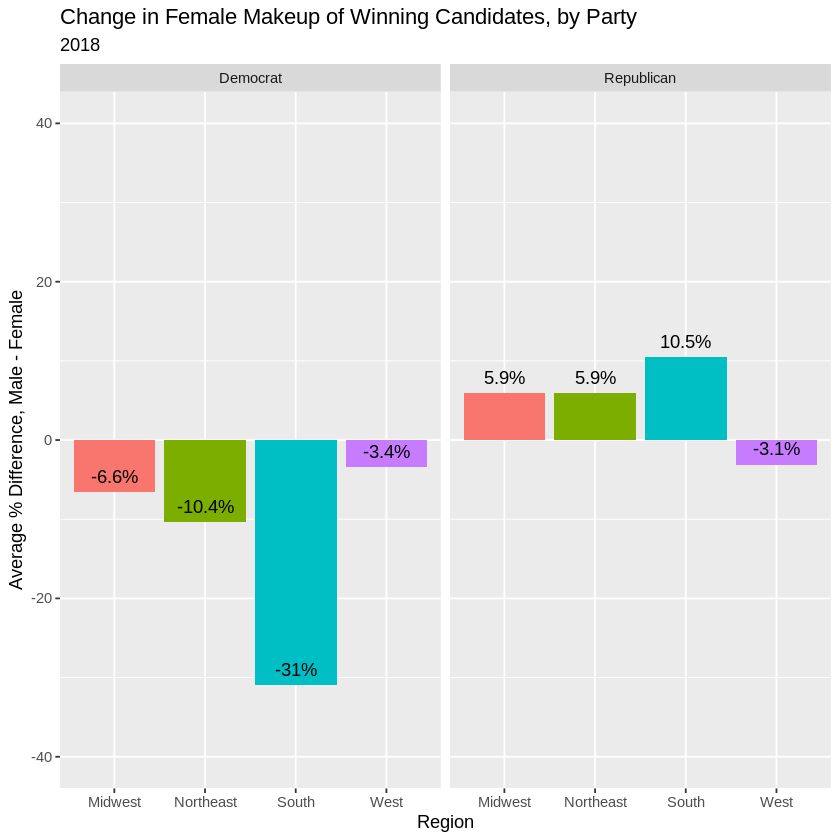

In [39]:
## 2016 vs 2018 winning pool make up
makeup_2016 <- elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff_2016 = male - female,
            diff_2016 = replace_na(diff_2016, 1)) %>%
    mutate(year = 2016)%>%
    select(year, region, state, winner_party, diff_2016)


makeup_2018 <- elections_2018 %>%
    filter(gender_democrat %in% c("male", "female"), gender_republican %in% c("male", "female"), winner_party %in% c("Democrat", "Republican")) %>%
    group_by(region, state, winner_party, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state", "winner_party"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff_2018 = male - female,
            diff_2018 = replace_na(diff_2018, 1)) %>%
    mutate(year = 2018) %>%
    select(year, region, state, winner_party, diff_2018)

makeup_total <- makeup_2016 %>%
    left_join(makeup_2018, by = c("region", "state", "winner_party"))

makeup_total %>%
    mutate(change = diff_2018 - diff_2016,
          change = replace_na(change, 0)) %>%
    group_by(region, winner_party) %>%
    summarize(avg_change = round(100*mean(change), 1)) %>%
    ggplot(aes(x = region, y = avg_change, fill = region, label = paste(avg_change, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ winner_party) +
        labs(title = "Change in Female Makeup of Winning Candidates, by Party",
            subtitle = "2018",
            x = "Region", 
            y = "Average % Difference, Male - Female") + 
        theme(legend.position = "none") + 
        ylim(-40,40)


`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



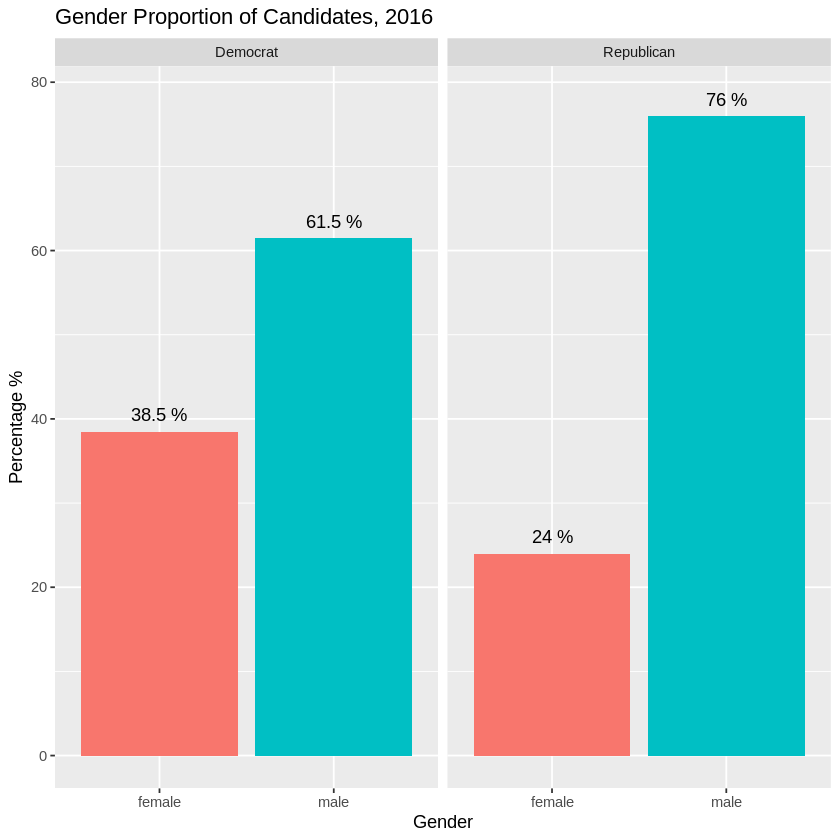

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,9,0.4090909
Alaska,male,13,0.5909091
Arkansas,female,4,0.1739130
Arkansas,male,19,0.8260870
California,female,13,0.2280702
California,male,44,0.7719298


`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



state,prop_diff
<chr>,<dbl>
Alaska,0.1818182
Arkansas,0.6521739
California,0.5438596
Colorado,0.1764706
Connecticut,0.4476190
Delaware,0.6000000


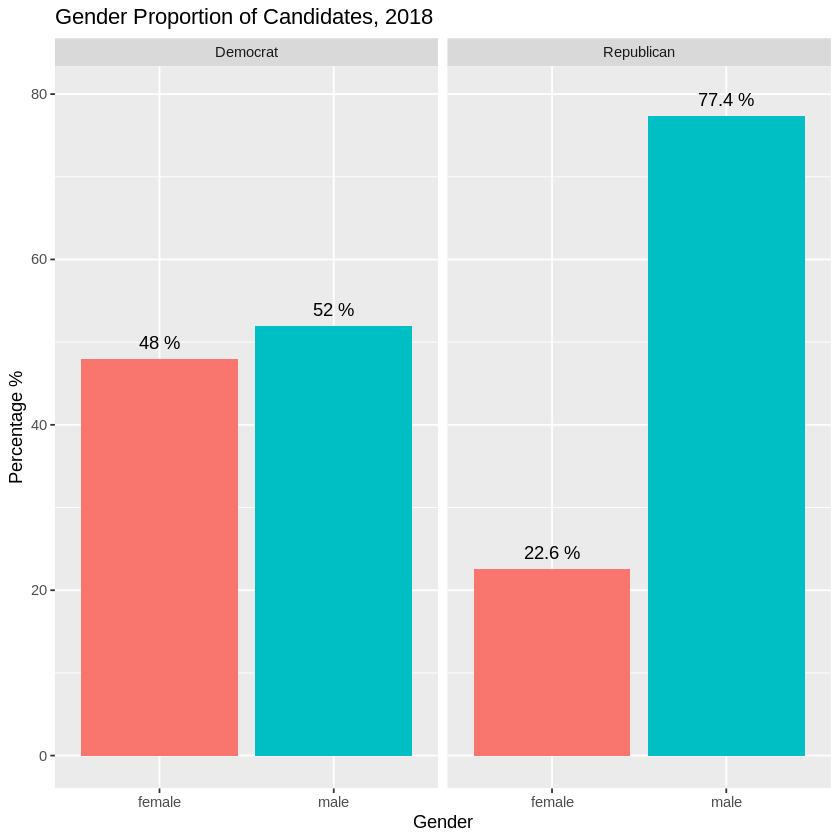

In [9]:
## Graphs
elections_2016_long %>%
    group_by(candidate_party, gender) %>%
    filter(gender %in% c("male", "female"), !is.na(total_votes), vote_prop < 0.75, candidate != "No candidate") %>%
    summarize(count = n()) %>%
    mutate(prop = round(100*count/sum(count),1)) %>%
    ggplot(aes(x = gender, y = prop, fill = gender, label = paste(prop, "%"))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        labs(title = "Gender Proportion of Candidates, 2016",
            y = "Percentage %",
            x = "Gender") +
        theme(legend.position = "none")

elections_2018_long %>%
    group_by(candidate_party, gender) %>%
    filter(gender %in% c("male", "female"), !is.na(total_votes), vote_prop < 0.75, candidate != "No candidate") %>%
    summarize(count = n()) %>%
    mutate(prop = round(100*count/sum(count),1)) %>%
    ggplot(aes(x = gender, y = prop, fill = gender, label = paste(prop, "%"))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        labs(title = "Gender Proportion of Candidates, 2018",
            y = "Percentage %",
            x = "Gender") +
        theme(legend.position = "none")



##Vote Prop of winning candidates

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>% # This calculation only works with paired rows, e.g. row 1 is state A Males, row 2 is state A Females, etc. tbh prob better to do these kind of calculations with wide datasets, will look at later
    filter(abs(prop_diff) > 0.05) %>%
    head()





In [10]:
head (elections_2018_long)
head(elections_2018)

,X,year,state,district,office,candidate,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity,region
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat,Missing,South
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat,Missing,South
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing,South


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year,region
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018,South
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018,South
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018,South
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018,South
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018,South
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018,South


In [11]:
elections_2018_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
    summarise (mean_gen_prop= mean (vote_prop)) 


elections_2016_long %>%
 filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
    summarise (mean_gen_prop= mean (vote_prop)) 


#overall vote.prop averages for Dem candidates by gender in races which weren't unopposed

`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4959456
male,0.4984242


`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4778499
male,0.4688065


In [12]:
elections_2018_long%>% 
    filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean (vote_prop)) 

elections_2016_long %>%
filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean(vote_prop)) 
#overall vote.prop averages for Repub candidates by gender in races which weren't unopposed
#2016 numbers off or would these higher props be due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4846782
male,0.5174242


`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.5334219
male,0.5482527


In [13]:
elections_2018_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean (vote_prop)) 

elections_2016_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)%>%
    group_by(gender)  %>%
summarise (mean_gen_prop= mean (vote_prop)) 


#overall props by gender regardless of party
#highers props due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4922684
male,0.5099602


`summarise()` ungrouping output (override with `.groups` argument)



gender,mean_gen_prop
<chr>,<dbl>
female,0.4988748
male,0.5132029


In [14]:
elections_2018_long%>% 
    filter(gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2018_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2018_long%>% 
    filter(candidate_party == "Republican", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()


#average voting props for women candidates grouped by state
elections_2016_long%>% 
    filter(gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2016_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

elections_2016_long%>% 
    filter(candidate_party == "Republican", gender %in% c("female"), vote_prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (vote_prop)) %>% head()

#was hoping to find differences in vote prop for women candidates by state between 2016 and 2018, splitting into parties as well
#is there a way to join between corresponding 2016 and 2018 summaries, then subtracting out?

`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.4260917
Alaska,0.5001140
Arizona,0.4911919
Arkansas,0.4934839
California,0.4902475
Colorado,0.5134712


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.3569806
Alaska,0.4412298
Arizona,0.4784230
Arkansas,0.4236310
California,0.5509966
Colorado,0.5468281


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.7124091
Alaska,0.5861756
Arizona,0.5160577
Arkansas,0.5866211
California,0.3943279
Colorado,0.4546060


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alaska,0.4671111
Arkansas,0.4528645
California,0.4902361
Colorado,0.5264582
Connecticut,0.5180139
Delaware,0.4445916


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alaska,0.3447284
Arkansas,0.3560999
California,0.5698057
Colorado,0.5197604
Connecticut,0.5266908
Delaware,0.4456568


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alaska,0.5612517
Arkansas,0.5818840
California,0.3672649
Colorado,0.5355200
Connecticut,0.5036783
Delaware,0.4427276


In [15]:
elections_2018_long%>% 
    filter(gender %in% c("female"), vote_prop !=1)%>%
    group_by(district)  %>%
    summarise (mean_gen_prop= mean (vote_prop)) %>% head()

#idea was to use process above (if someone finds it), and use at district level as well
#does this make sense at this level as something to find?


`summarise()` ungrouping output (override with `.groups` argument)



district,mean_gen_prop
<chr>,<dbl>
Addison-1,0.6559154
Addison-2,0.7564767
Addison-3,0.6562926
Addison-4,0.7061595
Addison-5,0.6430793
Addison-Rutland,0.4981745


In [16]:
reg1 <- elections_2018_long  %>% 
    filter (gender %in% c("male", "female"), vote_prop <0.75, race_ethnicity != "Missing") %>%
    lm (vote_prop~ candidate_party+region+ race_ethnicity + gender, data = .)
tidy (reg1)
#regression looking at effect of gender on voting share in 2018



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.600641197,0.022608242,26.56735544,6.878755e-110
candidate_partyRepublican,0.002900924,0.006595834,0.43981151,6.602014e-01
regionNortheast,-0.049919476,0.008120812,-6.14710370,1.286307e-09
regionSouth,-0.011110171,0.009015635,-1.23232264,2.182179e-01
regionWest,0.014302974,0.009236541,1.54852061,1.219222e-01
race_ethnicityBlack/African American,0.002075542,0.027092036,0.07661077,9.389538e-01
race_ethnicityHispanic/Latina,-0.014611615,0.026378237,-0.55392690,5.797953e-01
race_ethnicityMiddle Eastern/North African,-0.023173412,0.061826339,-0.37481456,7.079052e-01
race_ethnicityMultiracial,0.140468016,0.084555861,1.66124518,9.708551e-02


In [17]:
reg <- lm (vote_prop~ candidate_party+region+ gender,elections_2016_long  %>% filter (gender %in% c("male", "female"), vote_prop !=1))
tidy (reg)

#regression for 2016

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.467735871,0.006097219,76.7129858,0.000000e+00
candidate_partyRepublican,0.072333220,0.005123162,14.1188636,2.901125e-44
regionNortheast,0.007193868,0.007235767,0.9942094,3.201778e-01
regionSouth,0.009850056,0.006935316,1.4202751,1.556013e-01
regionWest,0.001685525,0.006670586,0.2526802,8.005276e-01
gendermale,0.000898352,0.005546490,0.1619676,8.713391e-01


In [18]:
reg <- lm (vote_prop~ candidate_party+region+ incumbent+ gender,elections_2016_long  %>% filter (gender %in% c("male", "female"), vote_prop !=1))
library (broom)
tidy (reg)

#regression for 2016, with incumbent added

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.403227623,0.004814776,83.7479547,0.000000e+00
candidate_partyRepublican,0.033539638,0.003985869,8.4146353,5.327656e-17
regionNortheast,-0.002316621,0.005542259,-0.4179922,6.759740e-01
regionSouth,0.007168139,0.005309735,1.3499994,1.770884e-01
regionWest,0.001452600,0.005106839,0.2844422,7.760855e-01
incumbentTrue,0.218678582,0.004000904,54.6572910,0.000000e+00
gendermale,-0.003760226,0.004247113,-0.8853605,3.760126e-01


In [19]:
## Combined regressions
temp18 <- elections_2018_long %>% 
    filter(gender %in% c("male", "female"), vote_prop <0.75, race_ethnicity %in% c("White", "Black/African American", "Hispanic/Latina"), candidate != "No candidate") %>%
    mutate(winner = ifelse(candidate_party == winner_party, TRUE, FALSE)) %>%
    select(year, vote_prop, gender, winner_party, region, candidate_party, race_ethnicity, winner)

temp16 <- elections_2016_long %>%
    filter(gender %in% c("male", "female"), vote_prop <0.75, race_ethnicity %in% c("White", "Black/African American", "Hispanic/Latina"), candidate != "No candidate") %>%
    mutate(winner = ifelse(candidate_party == winner_party, TRUE, FALSE)) %>%
    select(year, vote_prop, gender, winner_party, candidate_party, race_ethnicity, region, winner)


model_voteprop <- rbind(temp18, temp16) %>%
    lm(vote_prop ~ gender, data = .)

tidy(model_voteprop)


model_full_voteprop <- rbind(temp18, temp16) %>%
    lm(vote_prop ~ gender + region + candidate_party + race_ethnicity + as.factor(year), data = .)
tidy(model_full_voteprop)


model_winner <- rbind(temp18, temp16) %>%
    glm(winner ~ gender, data = ., family = "binomial")

tidy(model_winner)


model_full_winner <- rbind(temp18, temp16) %>%
    glm(winner ~ gender + region + candidate_party + race_ethnicity + as.factor(year), data = ., family = "binomial")
tidy(model_full_winner)




term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.57231882,0.002438476,234.7035110,0.0000000
gendermale,0.01604807,0.021492850,0.7466701,0.4554042


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.619076896,0.012860166,48.1391079,1.568908e-285
gendermale,0.009481791,0.020692123,0.4582319,6.468665e-01
regionNortheast,-0.032199192,0.006242074,-5.1584125,2.899162e-07
regionSouth,-0.009337740,0.006979840,-1.3378158,1.812030e-01
regionWest,0.010602887,0.006735844,1.5740992,1.157208e-01
candidate_partyRepublican,0.023463633,0.004973513,4.7177183,2.656939e-06
race_ethnicityHispanic/Latina,-0.024831894,0.016617781,-1.4942967,1.353537e-01
race_ethnicityWhite,-0.042376831,0.012462369,-3.4003833,6.944236e-04
as.factor(year)2018,-0.013057427,0.004807414,-2.7161022,6.697818e-03


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.8831337,0.08433153,22.3301271,1.883908e-110
gendermale,0.8249165,1.03622609,0.7960777,4.259869e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.01906268,0.4770847,4.2320841,2.315358e-05
gendermale,0.81719162,1.0395543,0.7860981,4.318100e-01
regionNortheast,-0.29509989,0.2181228,-1.3529069,1.760854e-01
regionSouth,-0.20555851,0.2483729,-0.8276205,4.078855e-01
regionWest,0.48840041,0.2842922,1.7179520,8.580536e-02
candidate_partyRepublican,0.08996900,0.1807842,0.4976596,6.187240e-01
race_ethnicityHispanic/Latina,1.74422133,1.1059123,1.5771787,1.147544e-01
race_ethnicityWhite,-0.09045365,0.4607914,-0.1963007,8.443748e-01
as.factor(year)2018,-0.11040669,0.1777430,-0.6211591,5.344949e-01


In [20]:
 ttest_2018_Dem_filtered<- elections_2018_long %>% 
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2018_Dem_filtered)

#did a bunch of t tests for 2018 and 2016


	Welch Two Sample t-test

data:  vote_prop by gender
t = -0.44178, df = 3653.6, p-value = 0.6587
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.013478889  0.008521572
sample estimates:
mean in group female   mean in group male 
           0.4959456            0.4984242 


In [21]:
 ttest_2018_Rep_filtered<- elections_2018_long%>% 
    filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2018_Rep_filtered)



	Welch Two Sample t-test

data:  vote_prop by gender
t = -5.1406, df = 1379.6, p-value = 3.132e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04524211 -0.02024992
sample estimates:
mean in group female   mean in group male 
           0.4846782            0.5174242 


In [22]:
 ttest_2018_overall_filtered<- elections_2018_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2018_overall_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = -4.3878, df = 5435.1, p-value = 1.167e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.025596266 -0.009787388
sample estimates:
mean in group female   mean in group male 
           0.4922684            0.5099602 


In [23]:
 ttest_2016_Dem_filtered<- elections_2016_long%>% 
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2016_Dem_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = 1.2095, df = 1721.6, p-value = 0.2266
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005621049  0.023707746
sample estimates:
mean in group female   mean in group male 
           0.4778499            0.4688065 


In [24]:
 ttest_2016_Repub_filtered<- elections_2016_long%>% 
    filter(candidate_party == "Republican", gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2016_Repub_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = -1.8717, df = 880.19, p-value = 0.06158
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0303822388  0.0007206848
sample estimates:
mean in group female   mean in group male 
           0.5334219            0.5482527 


In [25]:
 ttest_2016_overall_filtered<- elections_2016_long%>% 
    filter(gender %in% c("male", "female"), vote_prop !=1)

t.test (vote_prop ~ gender,data= ttest_2016_overall_filtered)


	Welch Two Sample t-test

data:  vote_prop by gender
t = -2.6007, df = 2608.5, p-value = 0.009356
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.025131144 -0.003524987
sample estimates:
mean in group female   mean in group male 
           0.4988748            0.5132029 
